# Segmentation on the raw data based on the age and the total amount spent.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Read the raw data  csv and display the first five rows
# Dataset Overview:
import os

# Construct the relative path
relative_path = os.path.join("data/raw", "retail_sales_dataset.csv")

retail_df = pd.read_csv(relative_path)
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [7]:

retail_df_copy = retail_df.copy()

# drop the columns that can cause colinearity and other irrelevant columns
retail_df_copy = retail_df_copy.drop(['Quantity', 'Price per Unit', 'Transaction ID', 'Date', 'Customer ID','Gender', 'Product Category'], axis=1)

X = retail_df_copy.copy()

In [8]:
# standarize the x variables using StandardScaler
scaler = StandardScaler()
X[['Age', 'Total Amount']] = scaler.fit_transform(X[['Age', 'Total Amount']])
X

,Age,Total Amount
0,-0.540565,-0.546704
1,-1.125592,0.971919
2,0.629489,-0.761098
3,-0.321180,0.078611
4,-0.833078,-0.636035
...,...,...
995,1.507029,-0.725366
996,0.775746,-0.653901
997,-1.344977,-0.636035
998,-0.394308,-0.546704


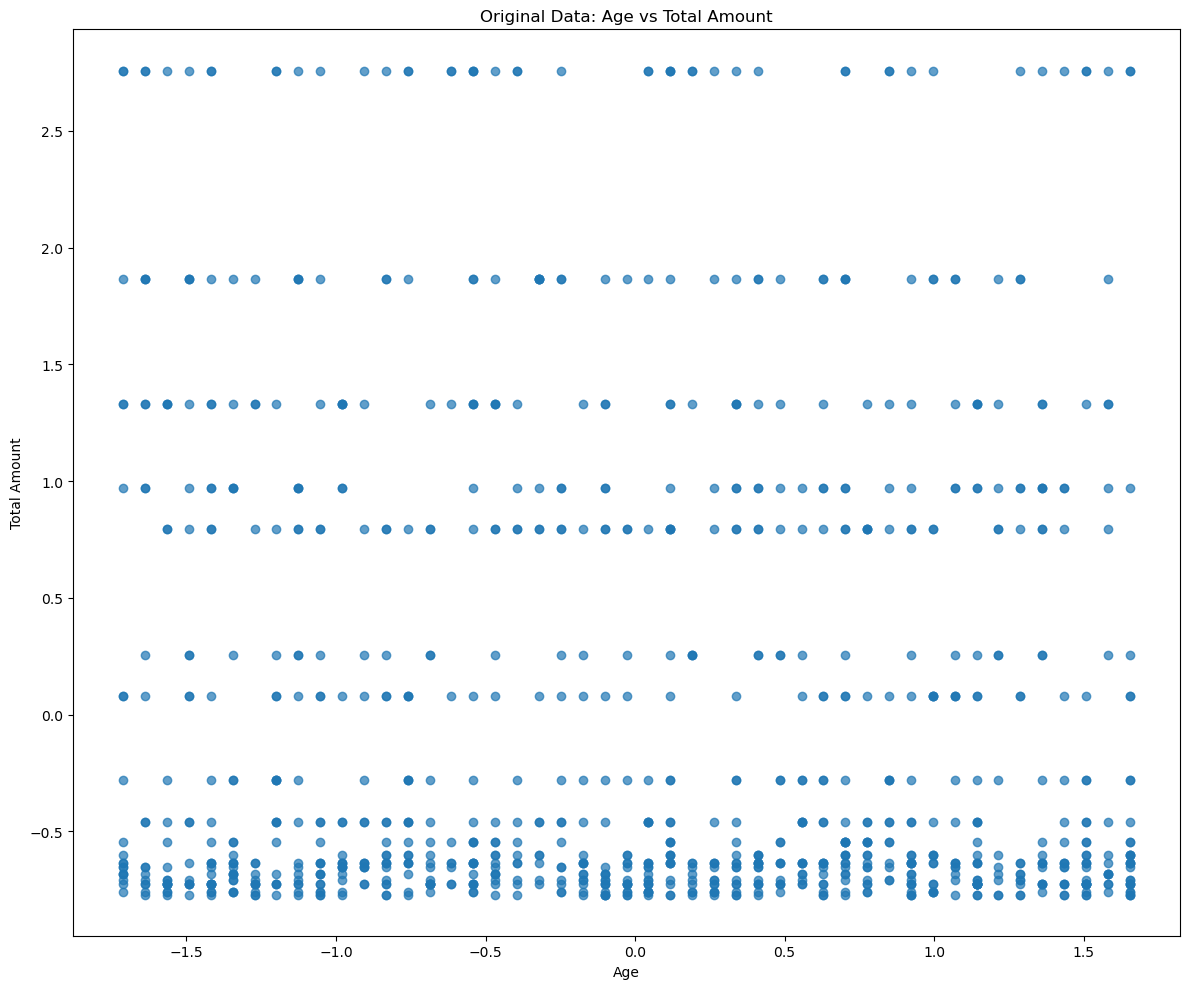

In [9]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(12, 10))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = X.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(X, feature_names, title_prefix='Original Data: ')

In [21]:

# Initialize the K-means model
kmeans = KMeans(n_clusters=3, random_state=123, n_init=10)

# Fit the model
clusters= kmeans.fit(X)


# Create a copy for clustering and modifictaions
clustered_retail_df = X.copy()

# Assign cluster labels to the original data as a new column
clustered_retail_df["Cluster"] = clusters.labels_
print(clustered_retail_df)

          Age  Total Amount  Cluster
0   -0.540565     -0.546704        1
1   -1.125592      0.971919        2
2    0.629489     -0.761098        0
3   -0.321180      0.078611        1
4   -0.833078     -0.636035        1
..        ...           ...      ...
995  1.507029     -0.725366        0
996  0.775746     -0.653901        0
997 -1.344977     -0.636035        1
998 -0.394308     -0.546704        1
999  0.410104     -0.600303        0

[1000 rows x 3 columns]


c:\Users\srees\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


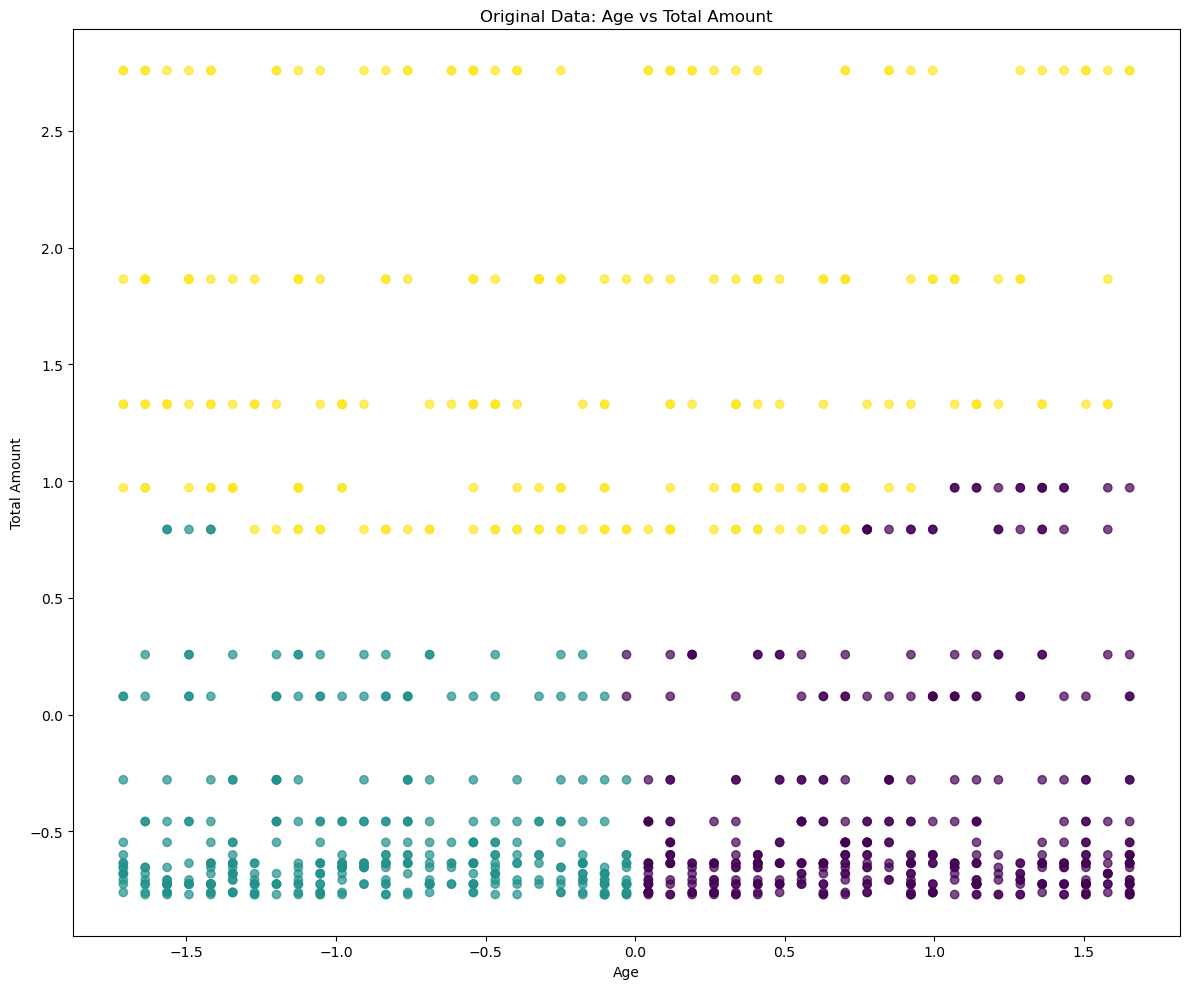

In [22]:
# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(X, feature_names,  color_labels=clustered_retail_df['Cluster'], title_prefix='Original Data: ')

* Across all age groups, low spenders are more common, while high spenders are relatively rare. This suggests that age is not a significant factor in determining spending behavior within this population.
